In [1]:
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as tkr
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
norm_price = pd.read_csv('train_price_normalized.csv')

In [4]:
norm_price.head()

,Unnamed: 0,item_id,category_name,price,deal_probability,log_price,cat_price,cat_std,norm_price,log_cat_price,log_cat_std,log_norm_price
0,0,b912c3c6a6ad,Товары для детей и игрушки,400.0,0.12789,5.993961,4129.398175,1.353662e+05,-0.027550,7.234338,1.379746,-0.898990
1,1,2dac0150717d,Мебель и интерьер,3000.0,0.00000,8.006701,32201.494859,3.555820e+06,-0.008212,7.841239,1.521999,0.108713
2,2,ba83aefab5dc,Аудио и видео,4000.0,0.43177,8.294300,7518.729245,1.979137e+05,-0.017779,7.614100,1.489456,0.456677
3,3,02996f1dd2ea,Товары для детей и игрушки,2200.0,0.80323,7.696667,4129.398175,1.353662e+05,-0.014253,7.234338,1.379746,0.335083
4,4,7c90be56d2ab,Автомобили,40000.0,0.20797,10.596660,377983.566760,5.233088e+05,-0.645859,12.283657,1.127274,-1.496527


In [5]:
train_df["norm_price"]=norm_price.norm_price
train_df["log_price"]=norm_price.log_price
train_df["log_norm_price"]=norm_price.log_norm_price

In [6]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,norm_price,log_price,log_norm_price
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,-0.027550,5.993961,-0.898990
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,-0.008212,8.006701,0.108713
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,-0.017779,8.294300,0.456677
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,-0.014253,7.696667,0.335083
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,-0.645859,10.596660,-1.496527


In [7]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}


In [8]:
train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

In [14]:
# For figure formatting
sns.set(font_scale=1.5)

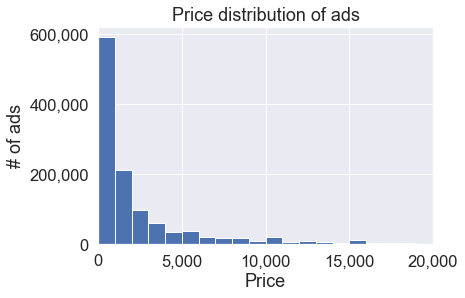

In [15]:
# choose subset of data
temp_train_df = train_df.price[train_df.price<20000]

# plot histogram
fig, ax = plt.subplots()
ax.hist(temp_train_df[:],bins=20)

# format histogram
ax.set_title(r'Price distribution of ads');
ax.set_xlabel('Price');
ax.set_ylabel('# of ads');
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(xmin=0, xmax=20000);

plt.show()

# save histogram
fig.savefig('fig1.jpg',bbox_inches='tight');

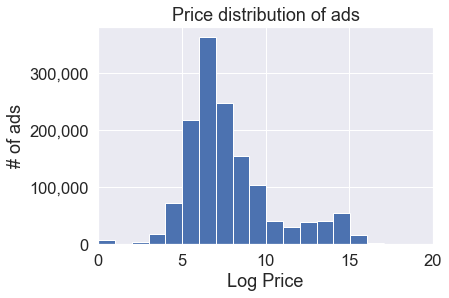

In [16]:
# plot histogram
fig, ax = plt.subplots()
ax.hist(train_df.log_price.dropna(),bins=25)

# format histogram
ax.set_title(r'Price distribution of ads');
ax.set_xlabel('Log Price');
ax.set_ylabel('# of ads');
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(xmin=0, xmax=20);

plt.show()

# save histogram
fig.savefig('fig2.jpg',bbox_inches='tight');

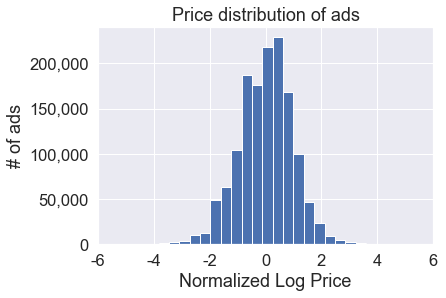

In [17]:
# plot histogram
fig, ax = plt.subplots()
ax.hist(train_df.log_norm_price.dropna(),bins=70)

# format histogram
ax.set_title(r'Price distribution of ads');
ax.set_xlabel('Normalized Log Price');
ax.set_ylabel('# of ads');
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(xmin=-6, xmax=6);

plt.show()

# save histogram
fig.savefig('fig5.jpg',bbox_inches='tight');

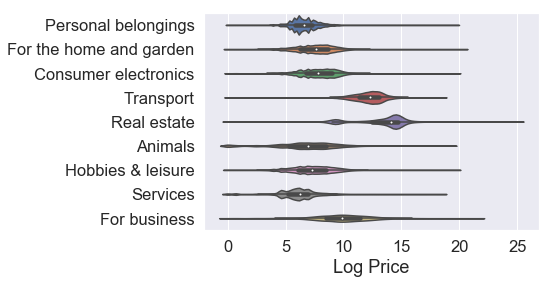

In [18]:
fig, ax = plt.subplots()
ax = sns.violinplot(y='parent_category_name_en', x='log_price', data=train_df);

# ax.set_title(r'Price distribution by Category');
ax.set_xlabel('Log Price');
ax.set_ylabel('');
fig.savefig('fig3.jpg',bbox_inches='tight');

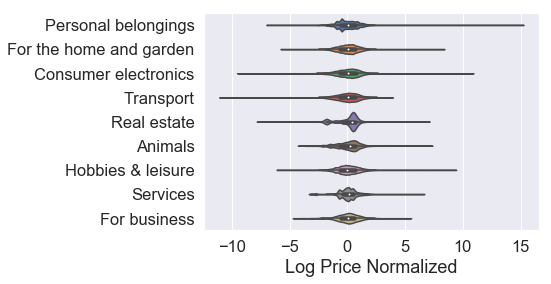

In [19]:
fig, ax = plt.subplots()
ax = sns.violinplot(y='parent_category_name_en', x='log_norm_price', data=train_df);

# ax.set_title(r'Price distribution by Category');
ax.set_xlabel('Log Price Normalized');
ax.set_ylabel('');
fig.savefig('fig4.jpg',bbox_inches='tight');